In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
    

In [2]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class'])

In [3]:
del df['Id']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,0:9])
data1h = scaler.transform(df.iloc[:,0:9])
print(data1h)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [5]:
dz=pd.DataFrame({'RI':data1h[:,0],'Na':data1h[:,1],'Mg':data1h[:,2],'Al':data1h[:,3],'Si':data1h[:,4],'K':data1h[:,5],'Ca':data1h[:,6],'Ba':data1h[:,7],'Fe':data1h[:,8],'Class':df['Class']})
print(dz)

           RI        Na        Mg        Al        Si         K        Ca  \
0    0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1   -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2   -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3   -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4   -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   
5   -0.793931 -0.758384  0.643117  0.351521  0.412905  0.219689 -0.624699   
6   -0.308744 -0.132382  0.636168 -0.612137  0.568197  0.127475 -0.554268   
7   -0.265836 -0.316500  0.643117 -0.792823  0.762313  0.112107 -0.504966   
8    0.268859  0.775936  0.622270 -0.150384 -0.738850  0.096738 -0.462707   
9   -0.269137 -0.500618  0.636168 -0.170460  0.438787  0.112107 -0.392276   
10  -0.876446 -0.844306  0.538881  0.231064  0.710549  0.265795 -0.610613   
11  -0.242732 -0.746110  0.677863 -0.351146  0.464669  0.158213 -0.279586   

In [6]:
X=dz.iloc[:,0:9]
y=dz['Class']
X_train=[]
X_test=[]
y_train=[]
y_test=[]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=5)
X_train=X_train.reset_index()
X_test=X_test.reset_index()
y_train=y_train.reset_index()
y_test=y_test.reset_index()
z=X_train.count()
del y_train['index']
del X_train['index']
del X_test['index']


In [12]:
acc=[]
err=[]
k1=[]
for k in range(1,30):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)  
    pred=neigh.predict(X_test)
    true=y_test['Class']
    acc.append(accuracy_score(true,pred))
    err.append(1-(accuracy_score(true,pred)))
    k1.append(k)

/opt/anaconda3-u/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [13]:
print(acc)
print(err)
print(k1)

[0.8153846153846154, 0.7846153846153846, 0.6923076923076923, 0.7076923076923077, 0.7076923076923077, 0.6923076923076923, 0.6923076923076923, 0.676923076923077, 0.7076923076923077, 0.6615384615384615, 0.6461538461538462, 0.6615384615384615, 0.6923076923076923, 0.676923076923077, 0.676923076923077, 0.6307692307692307, 0.6615384615384615, 0.6307692307692307, 0.6153846153846154, 0.6307692307692307, 0.6153846153846154, 0.6307692307692307, 0.6307692307692307, 0.6153846153846154, 0.6307692307692307, 0.6153846153846154, 0.6, 0.6307692307692307, 0.6153846153846154]
[0.18461538461538463, 0.2153846153846154, 0.3076923076923077, 0.29230769230769227, 0.29230769230769227, 0.3076923076923077, 0.3076923076923077, 0.32307692307692304, 0.29230769230769227, 0.3384615384615385, 0.3538461538461538, 0.3384615384615385, 0.3076923076923077, 0.32307692307692304, 0.32307692307692304, 0.36923076923076925, 0.3384615384615385, 0.36923076923076925, 0.3846153846153846, 0.36923076923076925, 0.3846153846153846, 0.3692

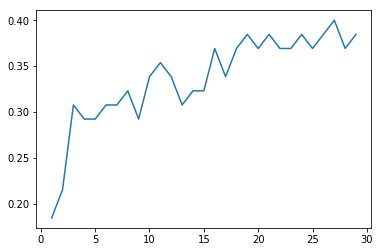

In [14]:
#import matplotlib.pyplot as plt
plt.plot(k1,err)
#plt.axis([0, 6, 0, 20])
plt.show()